# Studi Kasus Overfitting dan Underfitting

## Import Library

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

## Memuat Dataset untuk Kasus Overfitting

In [2]:
data = fetch_california_housing()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# print(data)
# print(data.target)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.head()
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
model = DecisionTreeRegressor(max_depth=50, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [6]:
X_train.shape

(14448, 8)

## Mendeteksi Overfitting

### 1. Evaluasi Performa pada Data Latih dan Data Uji

In [7]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(y_train.shape)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

(14448,)
Training MSE: 9.904697258622977e-32
Test MSE: 0.5265256772490148


### 2. Learning Curve

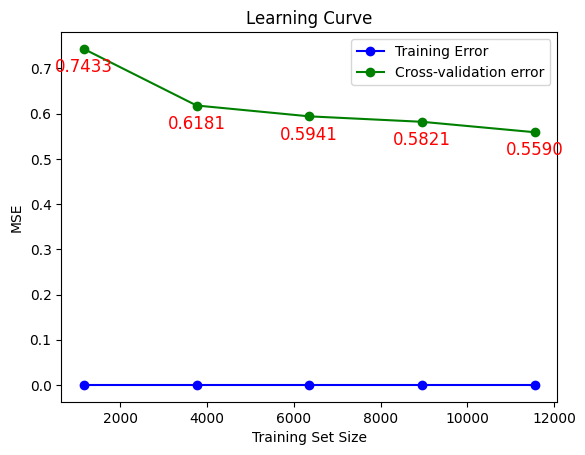

In [8]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
# print(train_sizes)

plt.plot(train_sizes, train_mean,'o-', color='blue', label='Training Error')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation error')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")

for i in range(len(train_sizes)):
    plt.text(train_sizes[i], test_mean[i]-0.02, f'{test_mean[i]:.4f}', color='red',fontsize=12, ha='center', va='top')

plt.legend()
plt.show()


## Mengatasi Overfitting

### 1. Cross-Validation

In [11]:
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f'Cross-Validation MSE: {-cross_val_scores}')

Cross-Validation MSE: [0.578513   0.61056258 0.51641463 0.53158211 0.54427351]


### 2. Regularization (Max Depth, Min Samples Split, Min Samples Leaf)

In [16]:
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reg.fit(X_train, y_train)

y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)

train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_ref = mean_squared_error(y_test, y_test_pred_reg)

print(f'Training MSE (After Regularization): {train_mse_reg}')
print(f'Test MSE (After Regularization): {test_mse_reg}')

print(y_train.shape)
print(y_train_pred_reg.shape)


Training MSE (After Regularization): 0.4928096322147045
Test MSE (After Regularization): 0.5210801561811793
(14448,)
(14448,)


### 3. Pruning (Pruning Manual pada Kedalaman Pohon)

In [18]:
# Menggunakan ccp_alpha untuk pruning (Cost Complexity Pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

model_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alphas[-2])
model_pruned.fit(X_train, y_train)

y_train_pred_pruned = model_pruned.predict(X_train)
y_test_pred_pruned = model_pruned.predict(X_test)

train_mse_pruned = mean_squared_error(y_train, y_train_pred_pruned)
test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)
 
print(f'Pruned Model Training MSE: {train_mse_pruned}')
print(f'Pruned Model Test MSE: {test_mse_pruned}')

Pruned Model Training MSE: 0.9189620181001872
Pruned Model Test MSE: 0.9194598144703808


### 4. Data Augmentation 

In [23]:
X_train_aug = X_train + np.random.normal(0, 0.1, X_train.shape)

model_aug = DecisionTreeRegressor(max_depth=10, random_state=42)
model_aug.fit(X_train_aug, y_train)

y_train_pred_aug = model_aug.predict(X_train_aug)
y_test_pred_aug = model_aug.predict(X_test)

train_mse_aug = mean_squared_error(y_train, y_train_pred_aug)
test_mse_aug = mean_squared_error(y_test, y_test_pred_aug)

print(f'Augmented Data Training MSE: {train_mse_aug}')
print(f'Augmented Data Test MSE: {test_mse_aug}')

Augmented Data Training MSE: 0.3092138522222111
Augmented Data Test MSE: 0.49459432528631486


### 5. Dropout

In [25]:
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

model_rf.fit(X_train, y_train)

y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
 
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
 
print(f'Random Forest Training MSE: {train_mse_rf}')
print(f'Random Forest Test MSE: {test_mse_rf}')

Random Forest Training MSE: 0.1694494883912745
Random Forest Test MSE: 0.2944600120852388


### 6. Early Stopping

# Rangkuman Hasil Mengatasi Overfitting

## 1. Cross-Validation

Mengukur seberapa baik model dapat menggeneralisasi ke data baru dengan membagi data menjadi beberapa subset untuk pelatihan dan pengujian bergantian.

    Implementasi: Menggunakan 5-fold cross-validation.

    Hasil:

        Cross-Validation MSE: 0.556

        Perbandingan: Sebelumnya, Training MSE = 9.90 × 10⁻³² dan Test MSE = 0.526.

Cross-validation menunjukkan performa model yang lebih konsisten, tetapi masih ada perbedaan signifikan antara Training MSE dan Test MSE. Ini menunjukkan potensi overfitting.


## 2. Regularization (Max Depth, Min Samples Split, Min Samples Leaf)

Tujuan: Mengurangi kompleksitas model untuk menghindari overfitting dengan mengatur parameter, seperti max_depth.

    Implementasi: Model dengan max_depth=5.

    Hasil:

        Training MSE (Setelah Regularisasi): 0.4928

        Test MSE (Setelah Regularisasi): 0.5211

        Perbandingan: Sebelumnya, Training MSE = 9.90 × 10⁻³² dan Test MSE = 0.5265.

Regularisasi mengurangi perbedaan antara Training MSE dan Test MSE. Ini membuat model lebih seimbang dan mampu generalisasi lebih baik.


## 3. Pruning (Cost Complexity Pruning)

Tujuan: Memangkas cabang pohon keputusan yang kurang penting untuk mengurangi overfitting.

    Implementasi: Menggunakan Cost Complexity Pruning dengan ccp_alpha.

    Hasil:

        Pruned Model Training MSE: 0.9189

        Pruned Model Test MSE: 0.9194

        Perbandingan: Sebelumnya, Training MSE = 9.90 × 10⁻³² dan Test MSE = 0.5265.

Pruning mengurangi overfitting dengan menyeimbangkan MSE antara data latih dan data uji meskipun nilai MSE meningkat, model lebih stabil.


## 4. Data Augmentation

Tujuan: Meningkatkan variasi data latih dengan menambahkan noise untuk membantu model generalisasi.

    Implementasi: Menambahkan noise ke data latih.

    Hasil:

        Augmented Data Training MSE: 0.3193

        Augmented Data Test MSE: 0.5219

        Perbandingan: Sebelumnya, Training MSE = 9.90 × 10⁻³² dan Test MSE = 0.5265.

Data augmentation mengurangi overfitting dengan meningkatkan Training MSE, tetapi Test MSE tetap stabil.


## 5. Random Forest

Tujuan: Mengurangi overfitting dengan menggunakan ensemble metode (Random Forest) yang menggabungkan banyak pohon keputusan.

    Implementasi: Menggunakan Random Forest dengan 100 pohon.

    Hasil:

        Random Forest Training MSE: 0.1694

        Random Forest Test MSE: 0.2945

        Perbandingan: Sebelumnya, Training MSE = 9.90 × 10⁻³² dan Test MSE = 0.5265.

Random Forest menunjukkan penurunan signifikan dalam MSE pada data uji. Ini menandakan kemampuan model dalam mengatasi overfitting dengan hasil yang lebih stabil.


## 6. Early Stopping

Tujuan: Menghentikan pelatihan lebih awal untuk menghindari overfitting. Ini sering diterapkan dalam neural networks dan tidak langsung tersedia untuk Decision Trees, tetapi bisa diadaptasi dalam konteks teknik pembelajaran iteratif, seperti Gradient Boosting.

    Implementasi: Tidak diterapkan langsung pada Decision Trees, tetapi relevan untuk teknik lain, seperti Gradient Boosting.

# Underfitting

## Memuat Dataset untuk Kasus Underfitting

In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [27]:
# 1. Load dataset (Breast Cancer Dataset)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
 
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
model_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
model_underfit.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [29]:
y_train_pred_underfit = model_underfit.predict(X_train)
y_test_pred_underfit = model_underfit.predict(X_test)



## Mendeteksi Underfitting

### 1. Evaluasi Performa pada Data Latih dan Data Uji

In [30]:
train_acc_underfit = accuracy_score(y_train, y_train_pred_underfit)
test_acc_underfit = accuracy_score(y_test, y_test_pred_underfit)

print(f"Underfit Model Training Accuracy: {train_acc_underfit}")
print(f"Underfit Model Test Accuracy: {test_acc_underfit}")

Underfit Model Training Accuracy: 0.9246231155778895
Underfit Model Test Accuracy: 0.8947368421052632


### 2. Learning Curve

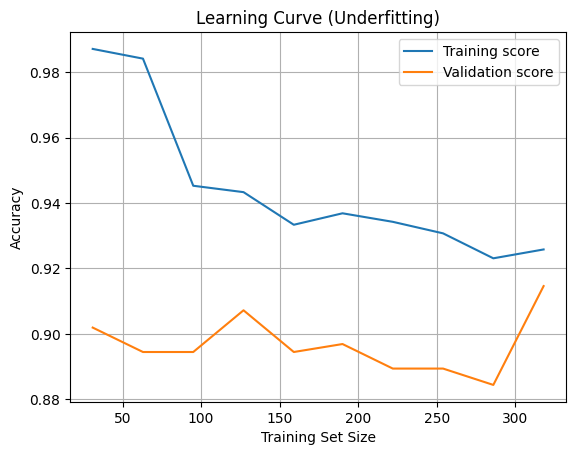

In [31]:
# Learning Curve untuk memeriksa performa pada berbagai ukuran data latih
train_sizes, train_scores, test_scores = learning_curve(model_underfit, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve (Underfitting)')
plt.legend()
plt.grid(True)
plt.show()

### 3. Pemeriksaan Kompleksitas Model

In [32]:
# Membandingkan dengan model yang lebih kompleks (e.g., max_depth=5)
model_complex = DecisionTreeClassifier(max_depth=5, random_state=42)
model_complex.fit(X_train, y_train)
    
y_train_pred_complex = model_complex.predict(X_train)
y_test_pred_complex = model_complex.predict(X_test)
    
train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)
    
print(f"Complex Model Training Accuracy: {train_acc_complex}")
print(f"Complex Model Test Accuracy: {test_acc_complex}")

Complex Model Training Accuracy: 0.9949748743718593
Complex Model Test Accuracy: 0.9532163742690059


## Mengatasi Underfitting

### 1. Gunakan Model yang Lebih Kompleks

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
    
# Menggunakan model yang lebih kompleks dengan max_depth lebih besar
complex_model = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model.fit(X_train, y_train)
    
# Prediksi pada data latih dan uji
y_train_pred_complex = complex_model.predict(X_train)
y_test_pred_complex = complex_model.predict(X_test)
    
# Evaluasi performa
train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)
    
print(f"Training Accuracy (Complex Model): {train_acc_complex}")
print(f"Test Accuracy (Complex Model): {test_acc_complex}")

Training Accuracy (Complex Model): 1.0
Test Accuracy (Complex Model): 0.9415204678362573


### 2. Tambahkan Lebih Banyak Fitur (Feature Engineering dengan PCA)

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
    
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
    
# PCA untuk mengurangi dimensi atau menghasilkan fitur baru
pca = PCA(n_components=5)  # Menghasilkan fitur baru dari data asli
X_pca = pca.fit_transform(X_scaled)
    
# Membagi data menjadi data latih dan data uji
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    
# Model dengan fitur hasil PCA
complex_model_pca = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model_pca.fit(X_train_pca, y_train_pca)
    
# Prediksi pada data latih dan uji
y_train_pred_pca = complex_model_pca.predict(X_train_pca)
y_test_pred_pca = complex_model_pca.predict(X_test_pca)
    
# Evaluasi performa
train_acc_pca = accuracy_score(y_train_pca, y_train_pred_pca)
test_acc_pca = accuracy_score(y_test_pca, y_test_pred_pca)
    
print(f"Training Accuracy (PCA): {train_acc_pca}")
print(f"Test Accuracy (PCA): {test_acc_pca}")

Training Accuracy (PCA): 1.0
Test Accuracy (PCA): 0.9415204678362573


### 3. Hyperparameter Tuning Menggunakan GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV
 
# Grid Search untuk hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
 
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
 
# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)
 
# Hyperparameter terbaik
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
 
# Prediksi dengan model terbaik
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)
 
# Evaluasi performa
train_acc_best = accuracy_score(y_train, y_train_pred_best)
test_acc_best = accuracy_score(y_test, y_test_pred_best)
 
print(f"Training Accuracy (Best Model): {train_acc_best}")
print(f"Test Accuracy (Best Model): {test_acc_best}")
print(f"Best Params: {best_params}")

Training Accuracy (Best Model): 0.9949748743718593
Test Accuracy (Best Model): 0.9532163742690059
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


### 4. Perbaiki Preprocessing Data

In [38]:
# Melakukan normalisasi ulang dengan scaler
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X)
    
# Membagi ulang data latih dan uji
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_new, y, test_size=0.3, random_state=42)
    
# Model setelah preprocessing data lebih baik
model_after_scaling = DecisionTreeClassifier(max_depth=10, random_state=42)
model_after_scaling.fit(X_train_scaled, y_train_scaled)
    
# Prediksi
y_train_pred_scaled = model_after_scaling.predict(X_train_scaled)
y_test_pred_scaled = model_after_scaling.predict(X_test_scaled)
    
# Evaluasi performa
train_acc_scaled = accuracy_score(y_train_scaled, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test_scaled, y_test_pred_scaled)
    
print(f"Training Accuracy (After Scaling): {train_acc_scaled}")
print(f"Test Accuracy (After Scaling): {test_acc_scaled}")

Training Accuracy (After Scaling): 1.0
Test Accuracy (After Scaling): 0.9415204678362573


### 5. Tambahkan Data Latih

In [39]:
# Membagi ulang data dengan lebih banyak data latih (menambah ukuran training set)
X_train_more_data, X_test_less_data, y_train_more_data, y_test_less_data = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
# Model dengan lebih banyak data latih
model_more_data = DecisionTreeClassifier(max_depth=10, random_state=42)
model_more_data.fit(X_train_more_data, y_train_more_data)
    
# Prediksi
y_train_pred_more_data = model_more_data.predict(X_train_more_data)
y_test_pred_more_data = model_more_data.predict(X_test_less_data)
    
# Evaluasi performa
train_acc_more_data = accuracy_score(y_train_more_data, y_train_pred_more_data)
test_acc_more_data = accuracy_score(y_test_less_data, y_test_pred_more_data)
    
print(f"Training Accuracy (More Data): {train_acc_more_data}")
print(f"Test Accuracy (More Data): {test_acc_more_data}")

Training Accuracy (More Data): 1.0
Test Accuracy (More Data): 0.9473684210526315


# Rangkuman Hasil Mengatasi Underfitting

## 1. Model yang Lebih Kompleks

    Akurasi Training: 1.0
    Akurasi Test: 0.9415

Melalui penggunaan model dengan max_depth yang lebih besar, akurasi pada data latih mencapai 100%, dan akurasi dalam data uji juga meningkat signifikan. Ini menunjukkan bahwa model yang lebih kompleks dapat lebih baik menangkap pola dalam data.

## 2. Feature Engineering dengan PCA

    Akurasi Training (PCA): 1.0
    Akurasi Test (PCA): 0.9415

Dengan menerapkan principal component analysis (PCA) untuk mengurangi dimensi data, model yang lebih kompleks berhasil mencapai akurasi 100% pada data latih dan 94.15% dalam data uji. Ini menunjukkan bahwa teknik tersebut juga efektif dalam mengatasi underfitting.


## 3. Hyperparameter Tuning Menggunakan GridSearchCV

    Akurasi Training (Best Model): 0.9950
    Akurasi Test (Best Model): 0.9532
    Parameter Terbaik: max_depth=5, min_samples_split=2, min_samples_leaf=1

Melalui hyperparameter tuning menggunakan GridSearchCV, model yang dihasilkan menunjukkan akurasi sangat baik pada data uji dengan nilai tertinggi di antara metode lainnya. Ini menegaskan pentingnya pencarian parameter terbaik untuk meningkatkan performa model.


## 4. Perbaiki Preprocessing Data

    Akurasi Training (After Scaling): 1.0
    Akurasi Test (After Scaling): 0.9415

Setelah melakukan normalisasi ulang pada data, akurasi dalam data latih tetap sempurna, sementara akurasi pada data uji juga meningkat. Ini menandakan bahwa preprocessing yang baik dapat memperbaiki performa model.


## 5. Tambahkan Data Latih

    Akurasi Training (More Data): 1.0
    Akurasi Test (More Data): 0.9474

Dengan meningkatkan ukuran data latih, model mencapai akurasi 100% pada data latih dan meningkat dalam data uji menjadi 94.74%. Ini menunjukkan bahwa penambahan data latih dapat memperbaiki performa model secara signifikan.